# Case Study : Rental Bike Sharing 

### Problem Statement:

#### Business Goal

## 1. Imoporting Necessary Libries

In [1]:
# importing neccessary libraries
############################# 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

############################# statsmodels
import statsmodels.regression.linear_model as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


############################# sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


############################# remove warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Reading Dataset ana Understanding the Data

In [2]:
# Reading the data and storing a dataframe name as bike_sharing

In [3]:
df = pd.read_csv("day.csv")
#df = pd.read_csv("C:\Users\SHIVJI\Downloads\Bike sharing Assignment\day.csv")   #my computer path name

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# total no of rows and columns in dataframe
df.shape

(730, 16)

In [6]:
#checking the summary for the numeric columns
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Check the Null value and  Datatype, Column wise information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# checking the total no of datatype columns

print("Total no of int64 dtype columns , ",df.select_dtypes(include=["int64"]).columns.shape[0])
print("Total no of float64 dtype columns , ",df.select_dtypes(include=["float64"]).columns.shape[0])
print("Total no of object dtype columns , ",df.select_dtypes(include=["object"]).columns.shape[0])

Total no of int64 dtype columns ,  11
Total no of float64 dtype columns ,  4
Total no of object dtype columns ,  1


#### Check null value in Dataset  

In [9]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Insight: 
* There are no **Null value**  in dataframe and  it contain 730 Rows and 16 Columns
* we need to use **cnt** column for the prediction purpose.
* Total no of int64 dtype columns ,  **11**
* Total no of float64 dtype columns ,  **4**
* Total no of object dtype columns ,  **1**

## Checking for Data quality

## 3. Cleaning the Data

##### 1.   Drop unwanted columns that are not necessary

Columns like -

- **instant** -  it is a only instance identifier
- **dteday** - dteday data is already extracted in columns like **mnth**, **yr**, **weekday**
- **casual** and **registered** variables, have a mixed column of casual and registered, column name is **cnt**   

In [10]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
df.drop(columns= ["instant",'dteday',"casual","registered"],inplace=True)

In [12]:
# dataset after removing unwanted columns

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# viewing the info after the droping columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [14]:
#checking the shape of the dataframe 
print("Shape of Dataframe after Droping the columns ,",df.shape)

Shape of Dataframe after Droping the columns , (730, 12)


#### insight

* Shape of the dataframe is reduced, it contain **12 columns** and the original dataframe have **16 columns**

#### 2. Check Null/Missing Value in Dataset

In [15]:
#### Again verify missing values 
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [16]:
# percentage of missing value in each columns 
(df.isnull().sum()/len(df))*100

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

**Insight:**
* There are no **Null value present in entire dataframe** (in each columns and rows)  

#### 3. Duplicate Value Checking 

In [17]:
#Create a dummy variable for duplicate check
df_dup = df

#Checking for duplicates and dropping entire duplicate row if any have 
df_dup.drop_duplicates(subset=None, inplace=True)
df_dup.shape

(730, 12)

#### insight

* The shape of the dataframe after running duplicate command is same as drop dataframe

#### 4. Handling Outliers

In [18]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


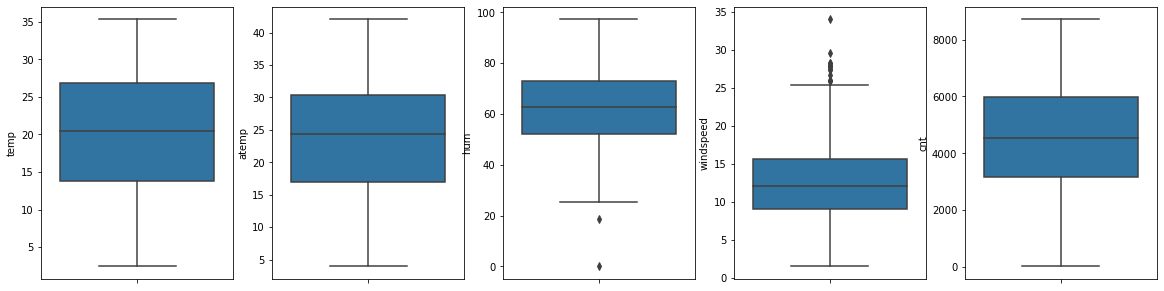

In [19]:
#checking outliers in cnt column using boxplot

all_cols = [ 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.rcParams["figure.figsize"]= (20,5)

i = 1
for col in all_cols:
    plt.subplot(1,5,i)
    sns.boxplot(y=col, data=df)
    i+=1
plt.savefig("boxplot of numerical variables")

**insight**

- From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

## 4. Perform EDA

**1. converting numerical data into categorical data variables**

- season :  (1:spring, 2:summer, 3:fall, 4:winter)
- yr :  (0: 2018, 1:2019)
- mnth :  ( 1 to 12)
- weekday : day of the week
- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [20]:
df.season.replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df.weathersit.replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)

df.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12], ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"],inplace=True)
df.yr.replace([0,1],[2018,2019],inplace=True)
df.weekday.replace([0,1,2,3,4,5,6],["sun","mon","tue","wed","thu","fri","sat"],inplace=True)


In [21]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,mon,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,tue,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,wed,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,thu,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,fri,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


##### 2. Draw pair plots to checking linear relationship


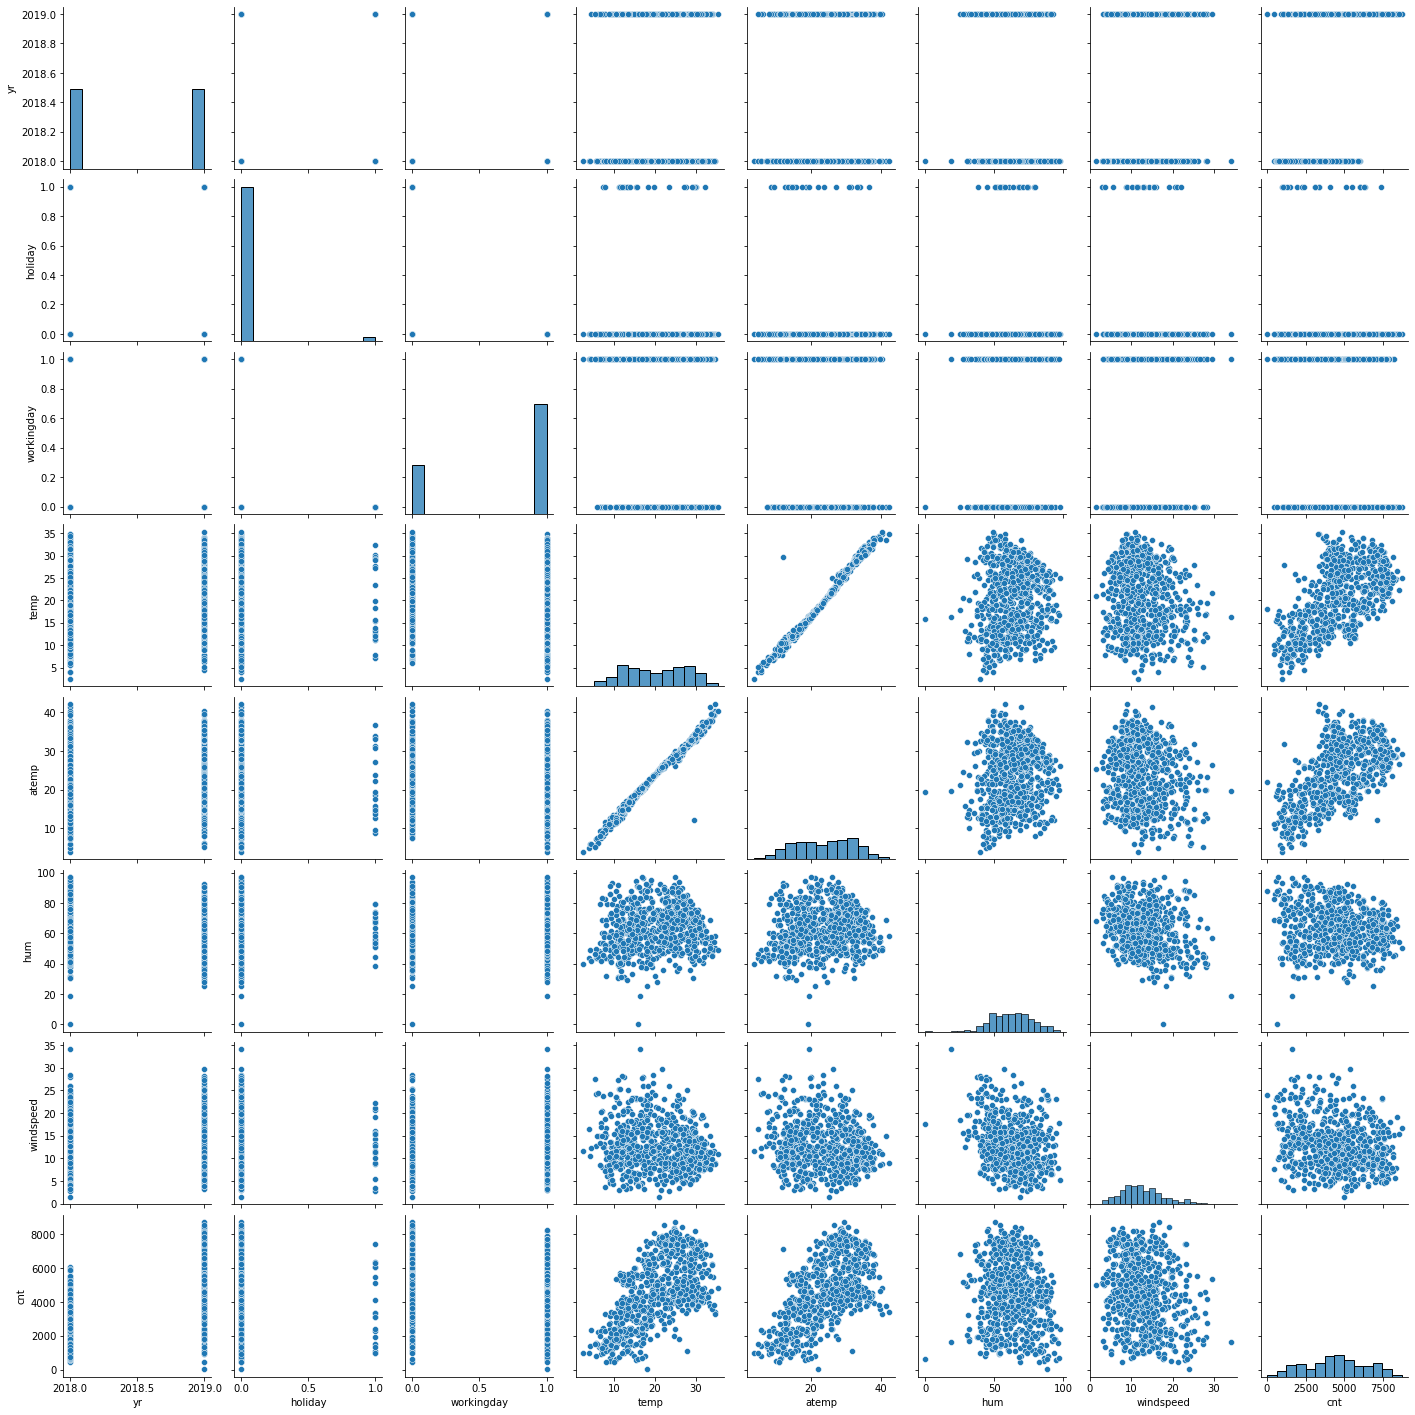

In [23]:
#pairplot for understanding the relation
sns.pairplot(df)

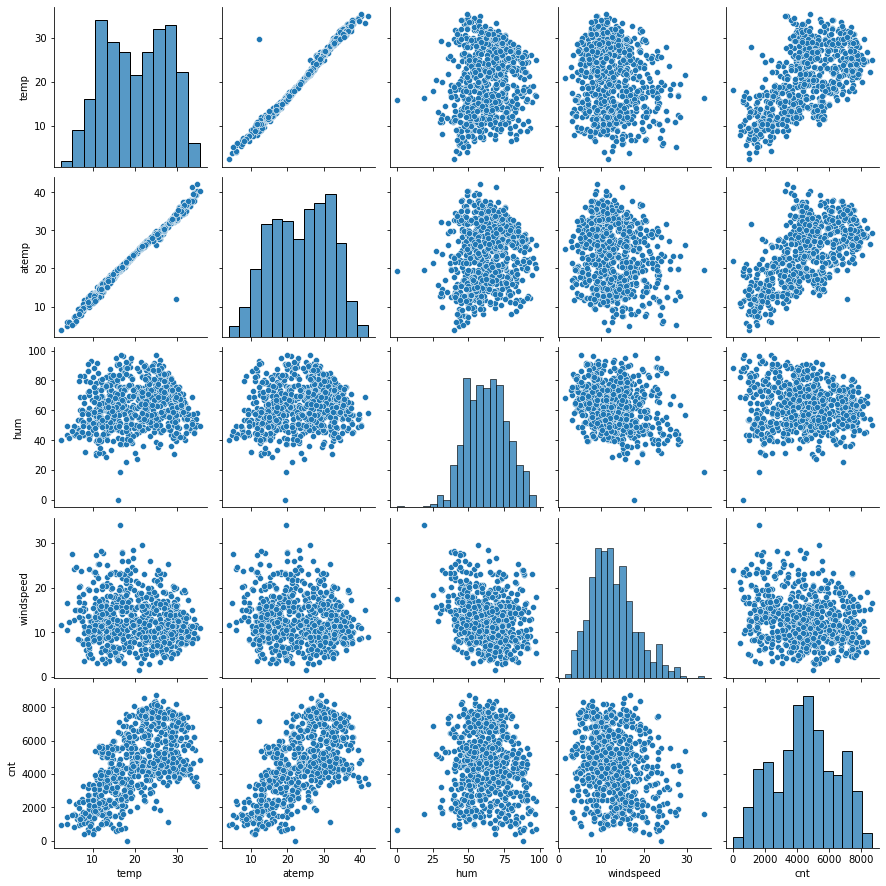

<Figure size 1440x360 with 0 Axes>

In [24]:
# pairplot for numeriacal value
sns.pairplot(data=df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()
plt.savefig("pairplot.jpg")

**insight**
- From the pairplots we can clearly conclude that there is a relation among 'temp', 'atemp' & 'cnt'.

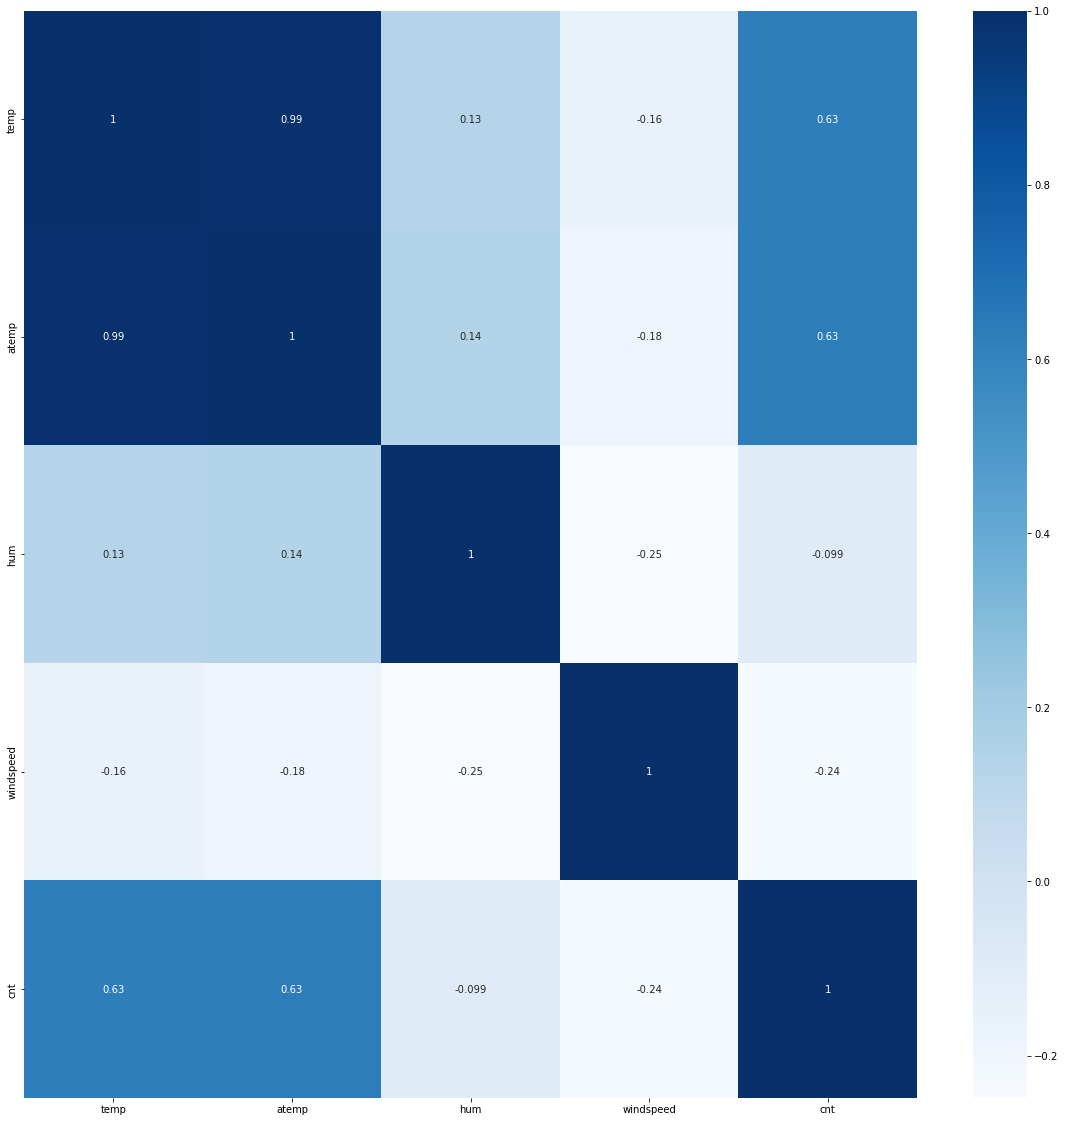

<Figure size 1440x1440 with 0 Axes>

In [25]:
#### Draw heatmaps for better understanding of relationship with each other
plt.rcParams["figure.figsize"] = (20,20)
sns.heatmap(df[["temp","atemp","hum",'windspeed',"cnt"]].corr(),cmap="Blues",annot=True)
plt.show()
plt.savefig("heatmap1")

**insight** 
- Here we can see that **temp** and **atemp** has correlation more than **0.99** means almost **1 (highly correlated)** and atemp seems to be derived from temp so atemp field can be dropped here only

#### 3. Visualising categorical variables using boxplots

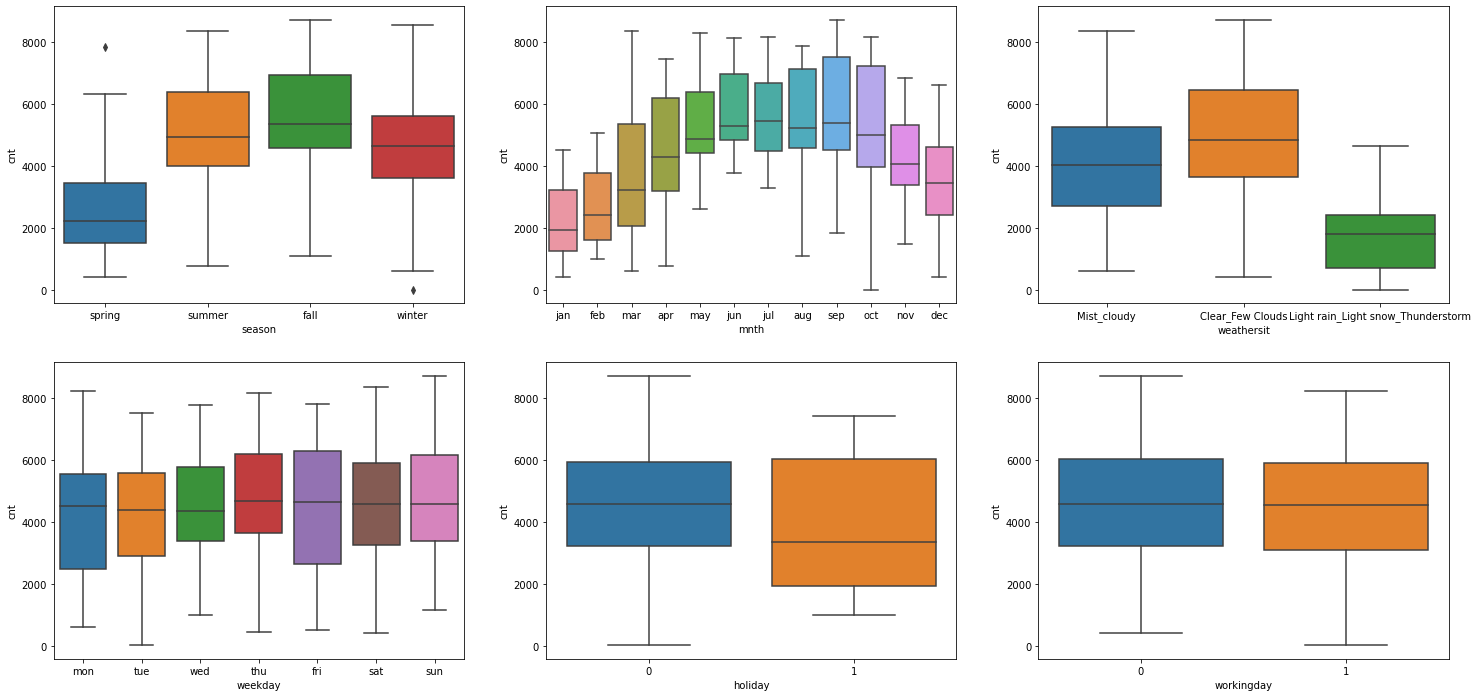

In [26]:
# Building boxplot for each categories using subplots
# using all categories  vs cnt for better understanding

plt.figure(figsize=(25,12))

cat_vars = ["season", "mnth","weathersit","weekday","holiday","workingday"] 

i = 1
for var in cat_vars:
    
    plt.subplot(2,3,i)
    sns.boxplot(x=var, y = "cnt", data=df)
    i+=1
    
plt.savefig("Categorical variables vs cnt plot")

**insight**


- 1. **season** -  the demand of rental bikes is highest in fall (autumn) season. the demand is 4500+ ( for the 2 Years period only).

- 2. **mnth**   -  the demand of the bikes continusoly increasing upto **july** month, and the highest demand in the **july** and **september** month. After the  **september** month demand of bikes is decreasing

- 3. **weathershit** - clear weathershit has highest demand and lowest demand in the thunderstorm weather.

- 4. **weekday** - in weekday trend is very closer between 4000 - 5000

- 5. **holiday** - when holiday is occur demand has decreased as compared to Non Holiday.

- 6. **workingday** - maximum booking happening between 4000-5000.

some columns is very good predictor **season**, 
**mnth**,**weathershit**, **workingday**, **weekday**

**Holiday** can't be a good prediator.


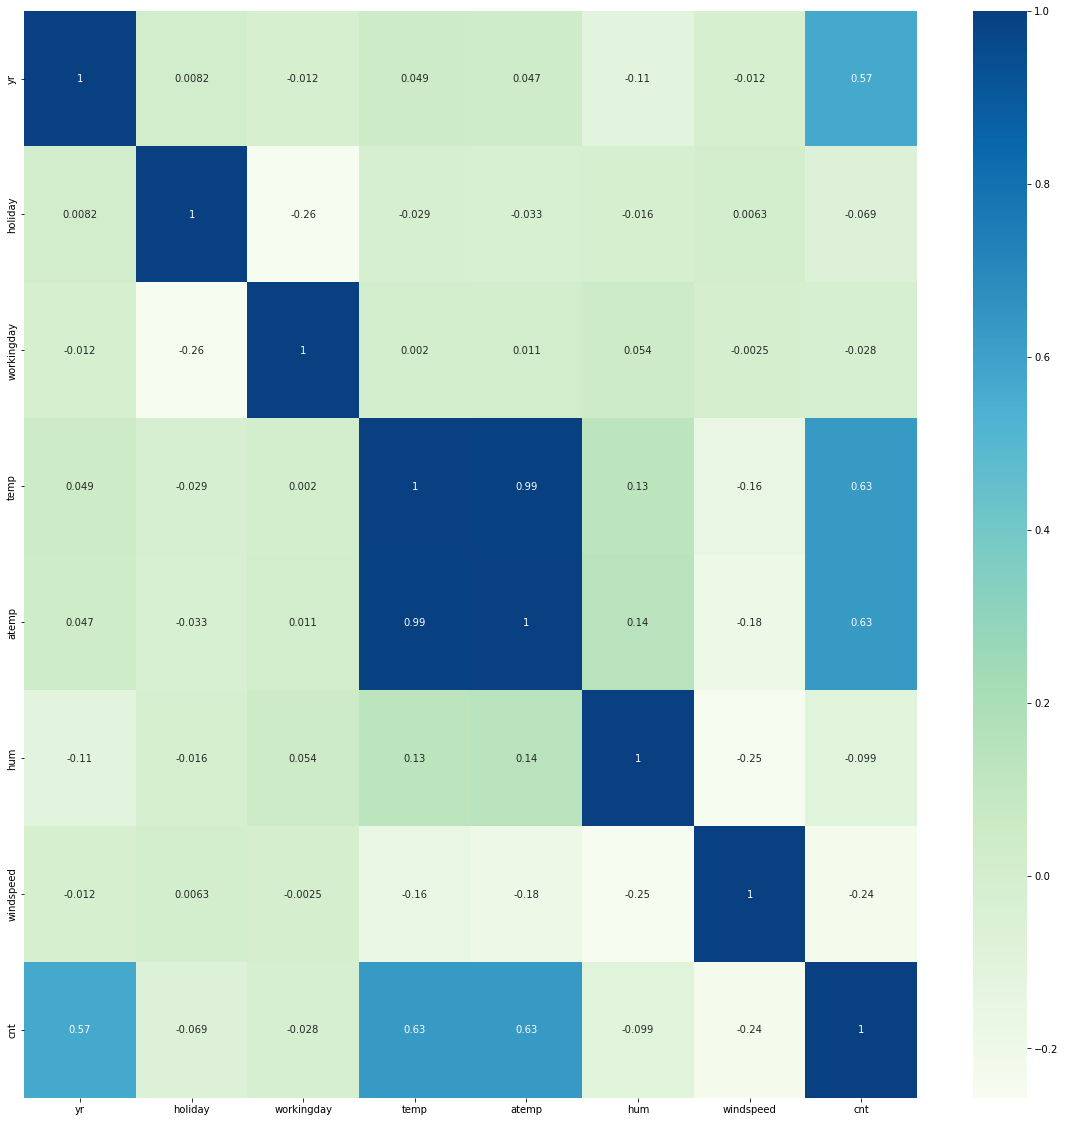

In [27]:
#### ploting heatmapt
sns.heatmap(df.corr(), annot=True, cmap="GnBu")
plt.savefig("correlated heatmap2")
plt.show()


**insight**

- temp and atemp is highly corrleated with cnt variables.

#### 4. ploting a scatter plot

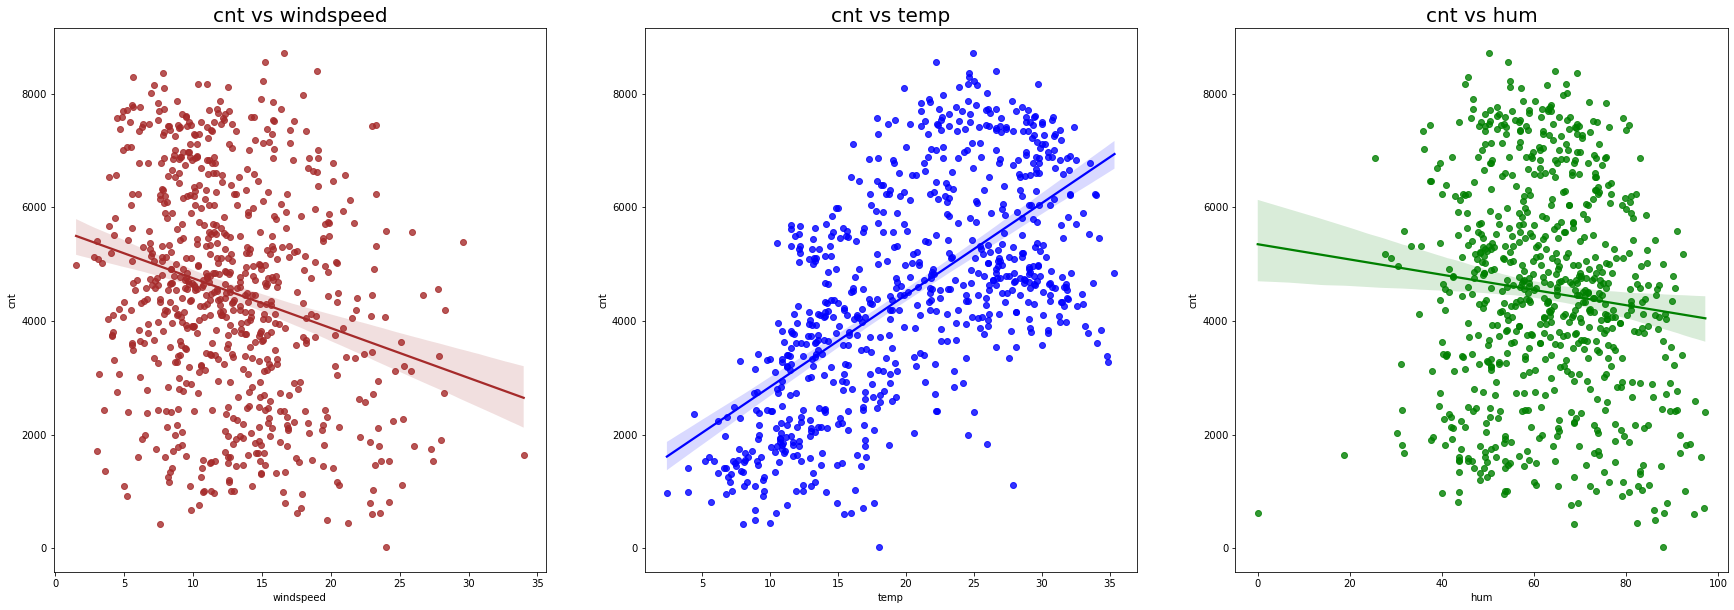

In [28]:
#ploting scatter plot using regression line
# 1. releationship between cnt vs windspeed
# 2. releationship between cnt vs temp
# 3. releationship between cnt vs hum

plt.figure(figsize=(30,10))

plt.subplot(1, 3 , 1)
plt.title("cnt vs windspeed", size=20)
sns.regplot(data=df, x="windspeed", y="cnt",color="brown")

plt.subplot(1, 3 , 2)
plt.title("cnt vs temp", size=20)
sns.regplot(data=df, x="temp", y="cnt",color="b")

plt.subplot(1, 3 , 3)
plt.title("cnt vs hum", size=20)
sns.regplot(data=df, x="hum", y="cnt",color="g" )

plt.savefig("scatter plot using linear regression")
plt.show()

**insight**

* In Plot 1 

i) cnt is decreasing with increasing in windspeed   
ii) windspeed value is more scatterd around

* In Plot 2 

i) cnt is giving linear relationship with temp    
ii)  cnt is less scatter than ohters two
* In Plot 3 

i) cnt is decreasing with increasing in temp.    
ii) humidity value are more scattered

## 5 Data Preprations 

In [29]:
#for showing all columns name
pd.options.display.max_columns = None

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 90.3+ KB


#### 1. Creating Dummy variables for categorical data 

In [31]:
# new dataframe for prevent the data loss
bike = df

# there are three things 
# 1. Creating dummy variables
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_df = pd.get_dummies(bike, columns=["season","mnth","weathersit","yr","weekday"], drop_first=True)
bike_df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,yr_2019,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# information after creating dummy variable

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   holiday                                        730 non-null    int64  
 1   workingday                                     730 non-null    int64  
 2   temp                                           730 non-null    float64
 3   atemp                                          730 non-null    float64
 4   hum                                            730 non-null    float64
 5   windspeed                                      730 non-null    float64
 6   cnt                                            730 non-null    int64  
 7   season_spring                                  730 non-null    uint8  
 8   season_summer                                  730 non-null    uint8  
 9   season_winter                                  730 non

# 6. Model Building

In [33]:
#shape of dataset before spiliting 
bike_df.shape

(730, 30)

### 1. Split Data into training and test 

In [34]:
#y to contain only target variable
y = bike_df.pop("cnt")

In [35]:
#independent variables
X = bike_df

In [36]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64

In [37]:
X

,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,yr_2019,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,10.420847,11.33210,65.2917,23.458911,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
726,0,0,10.386653,12.75230,59.0000,10.416557,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
727,0,0,10.386653,12.12000,75.2917,8.333661,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
728,0,1,10.489153,11.58500,48.3333,23.500518,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [38]:
##### now creating  train test data frame with 70:30 ratio
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=100)

In [39]:
# checking the shape of data frame 
display(X_train.shape)
display(X_test.shape)

(511, 29)

(219, 29)

In [40]:
# describe the X_train 
X_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,yr_2019,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.025440,0.712329,20.106483,23.499390,63.109443,12.833686,0.242661,0.246575,0.248532,0.095890,0.084149,0.066536,0.088063,0.076321,0.076321,0.097847,0.084149,0.086106,0.086106,0.080235,0.029354,0.344423,0.508806,0.154599,0.129159,0.136986,0.142857,0.152642,0.136986
std,0.157613,0.453121,7.424445,8.083052,14.142965,5.286912,0.429112,0.431440,0.432585,0.294729,0.277883,0.249461,0.283664,0.265771,0.265771,0.297399,0.277883,0.280795,0.280795,0.271923,0.168963,0.475645,0.500412,0.361876,0.335704,0.344170,0.350270,0.359994,0.344170
min,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.649576,16.634475,52.291650,9.041918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.260847,24.115200,63.416700,12.124789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,26.615847,30.177700,73.208350,15.750595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# describe the X_test 
X_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,yr_2019,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.639269,20.815737,24.255828,61.961883,12.600130,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.027397,0.319635,0.479452,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.188034,0.481313,7.689600,8.299641,14.456669,4.984858,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.163612,0.467403,0.500722,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,14.093750,17.085500,51.166700,9.021282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.807500,24.873150,60.916700,12.167200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,27.401653,31.155725,72.192050,15.395629,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**insight**

- After the splitting the data shape of the dataframe is **changed**
- Dataset is divided into **70:30** ratio

## 2. Feature Scaling 

- to make all features in same scale to interpret easily variables.


#### 1. Using min max scaling

In [42]:
#importing sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [43]:
#creating an object of scaler for rescaling the important numerical feature like temp, atemp, hum, windspeed, cnt

num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [44]:
#inspect after scaling
X_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,yr_2019,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.025440,0.712329,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,0.095890,0.084149,0.066536,0.088063,0.076321,0.076321,0.097847,0.084149,0.086106,0.086106,0.080235,0.029354,0.344423,0.508806,0.154599,0.129159,0.136986,0.142857,0.152642,0.136986
std,0.157613,0.453121,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,0.294729,0.277883,0.249461,0.283664,0.265771,0.265771,0.297399,0.277883,0.280795,0.280795,0.271923,0.168963,0.475645,0.500412,0.361876,0.335704,0.344170,0.350270,0.359994,0.344170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,yr_2019,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
653,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
576,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
426,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0
728,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0


## 3. Building a model using RFE(reduce feature elemination)


#### Building a linear model 

In [46]:
#Building a linear regression model using sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### eleminate some columns using RFE approach

In [47]:
#using rfe for 15 variables
rfe = RFE(lr, 15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [48]:
#selected columns by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 9),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sep', True, 1),
 ('weathersit_Light rain_Light snow_Thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1),
 ('yr_2019', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 11)]

In [49]:
# to check supporting column and unsupporting columns using by the model rfe.support

print("Supportable columns - ",X_train.columns[rfe.support_].tolist())
print()
print()
print("Unsupportable columns - ",X_train.columns[~rfe.support_].tolist())

Supportable columns -  ['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sep', 'weathersit_Light rain_Light snow_Thunderstorm', 'weathersit_Mist_cloudy', 'yr_2019']


Unsupportable columns -  ['workingday', 'atemp', 'mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed']


In [50]:
#creating X_test dataframe with RFE selected variables
col =X_train.columns[rfe.support_]

X_train_rfe = X_train[col]

## 4. Model Building

### Model 1 

**VIF Check**

In [51]:
# checking VIF values of feature variables
#create a dataframe that wil contain the names of all features variablea and their respective VIF values


vif = pd.DataFrame()
vif["features"] = X_train_rfe.columns
vif["vif"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["vif"] = round(vif["vif"] , 2)
vif = vif.sort_values(by= "vif", ascending = False)
vif

,features,vif
2,hum,30.93
1,temp,17.82
3,windspeed,4.73
4,season_spring,4.37
6,season_winter,4.06
5,season_summer,2.82
13,weathersit_Mist_cloudy,2.32
14,yr_2019,2.09
10,mnth_nov,1.83
8,mnth_jan,1.75


In [52]:
# adding a constant 
X_train_sm1  = sm.add_constant(X_train_rfe)

#using OLS create a fitted model
lr_model1 = sm.OLS(y_train, X_train_sm1).fit()

#Summary of model
print(lr_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     180.1
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          2.29e-189
Time:                        16:04:05   Log-Likelihood:                -4120.0
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     495   BIC:                             8340.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

##### We will remove variable as below combination
- High P , High VIF
- High P , Low VIF
- Low P , High VIF

#### Model 2 

In [53]:
# the column "hum" has High VIF value with negative coefficient
X_train_new = X_train_rfe.drop("hum", axis=1)

**Checking VIF**

In [54]:
# checking VIF values of feature variables
#create a dataframe that wil contain the names of all features variablea and their respective VIF values

vif = pd.DataFrame()
vif["features"] = X_train_new.columns
vif["vif"] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif["vif"] = round(vif["vif"] , 2)
vif = vif.sort_values(by= "vif", ascending = False)
vif

,features,vif
1,temp,5.18
2,windspeed,4.67
5,season_winter,2.94
3,season_spring,2.89
4,season_summer,2.24
13,yr_2019,2.08
9,mnth_nov,1.80
7,mnth_jan,1.66
8,mnth_jul,1.59
12,weathersit_Mist_cloudy,1.56


In [55]:
# adding constant
X_train_sm2 = sm.add_constant(X_train_new)

# building a fitted model 
lr_model2 = sm.OLS(y_train, X_train_sm2).fit()

# summary of model
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          1.41e-186
Time:                        16:04:06   Log-Likelihood:                -4129.4
No. Observations:                 511   AIC:                             8289.
Df Residuals:                     496   BIC:                             8352.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**Model 3**

In [56]:
# column season_summer have high p value and VIF value which is insignificant we drop it
X_train_new = X_train_new.drop("season_summer",axis=1)

In [57]:
#checking VIF of feature variables
vif = pd.DataFrame()
vif["features"] = X_train_new.columns
vif["vif"] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif["vif"] = round(vif["vif"], 2)
vif = vif.sort_values(by = "vif", ascending=False)
vif

,features,vif
1,temp,4.68
2,windspeed,4.05
4,season_winter,2.54
3,season_spring,2.36
12,yr_2019,2.07
8,mnth_nov,1.80
6,mnth_jan,1.65
11,weathersit_Mist_cloudy,1.53
5,mnth_dec,1.46
7,mnth_jul,1.36


In [58]:
# adding new constant 
X_train_sm3 = sm.add_constant(X_train_new)

# Create a fitted model
lr_model3 = sm.OLS(y_train, X_train_sm3).fit()

#summary of model
print(lr_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          1.15e-186
Time:                        16:04:06   Log-Likelihood:                -4132.0
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     497   BIC:                             8351.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**Model 4**

In [59]:
# drop the column mnth_nov beacuase it have high p-value
X_train_new = X_train_new.drop("mnth_nov", axis=1)

In [60]:
#checking VIF and creating a new dataframe 
#checking VIF of feature variables
vif = pd.DataFrame()
vif["features"] = X_train_new.columns
vif["vif"] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif["vif"] = round(vif["vif"], 2)
vif = vif.sort_values(by = "vif", ascending=False)
vif

,features,vif
1,temp,4.64
2,windspeed,4.01
3,season_spring,2.36
11,yr_2019,2.07
4,season_winter,1.64
6,mnth_jan,1.64
10,weathersit_Mist_cloudy,1.53
7,mnth_jul,1.36
5,mnth_dec,1.29
8,mnth_sep,1.20


In [61]:
# adding new constant 
X_train_sm4 = sm.add_constant(X_train_new)

# Create a fitted model
lr_model4 = sm.OLS(y_train, X_train_sm4).fit()

#summary of model
print(lr_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.8
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          2.18e-186
Time:                        16:04:06   Log-Likelihood:                -4135.4
No. Observations:                 511   AIC:                             8297.
Df Residuals:                     498   BIC:                             8352.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**Model 5**

In [62]:
# removing wind speed due to high vif
X_train_new = X_train_new.drop("windspeed", axis=1)

In [63]:

#creating dataframe and checking vif
vif = pd.DataFrame()
vif["features"] = X_train_new.columns
vif["vif"] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif["vif"] = round( vif["vif"],2 )
vif= vif.sort_values("vif", ascending=False)
vif

,features,vif
1,temp,3.04
10,yr_2019,2.06
2,season_spring,1.92
5,mnth_jan,1.64
3,season_winter,1.57
9,weathersit_Mist_cloudy,1.52
6,mnth_jul,1.34
4,mnth_dec,1.29
7,mnth_sep,1.19
8,weathersit_Light rain_Light snow_Thunderstorm,1.07


In [64]:
#adding new constant
X_train_sm5 = sm.add_constant(X_train_new)

#created a fitted model
lr_model5 = sm.OLS(y_train, X_train_sm5).fit()


#summary
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.6
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          6.37e-180
Time:                        16:04:07   Log-Likelihood:                -4153.5
No. Observations:                 511   AIC:                             8331.
Df Residuals:                     499   BIC:                             8382.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          1823.9228    199.768      9.130      0.000    1431.433    2216.413
holiday                                        -885.1098    235.137     -3.764      0.000   -1347.090    -423.130
temp                                           3916.8515    284.055     13.789      0.000    3358.760    4474.943
season_spring                                  -909.4013    141.011     -6.449      0.000   -1186.449    -632.354
season_winter                                   487.3570    113.427      4.297      0.000     264.504     710.210
mnth_dec                                       -200.2359    146.002     -1.371      0.171    -487.089      86.618
mnth_jan                                       -288.6007    162.553     -1.775      0.076    -607.973      30.771
mnth_jul                                       -567.2159    157.201     -3.608      0.000    -876.074    -258.358
mnth_sep                                        569.6446    141.572      4.024      0.000     291.494     847.795
weathersit_Light rain_Light snow_Thunderstorm -2638.9578    222.349    -11.869      0.000   -3075.813   -2202.103
weathersit_Mist_cloudy                         -677.2288     78.980     -8.575      0.000    -832.404    -522.054
yr_2019                                        2034.4838     74.172     27.429      0.000    1888.757    2180.211
==============================================================================
Omnibus:                       70.752   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.163
Skew:                          -0.695   Prob(JB):                     1.02e-40
Kurtosis:                       5.591   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model 6**

In [65]:
#column mnth_dec has very high p value so we drop it
X_train_new = X_train_new.drop("mnth_dec",1)

In [66]:
#creating dataframe and checking vif
vif = pd.DataFrame()
vif["features"] = X_train_new.columns
vif["vif"] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif["vif"] = round( vif["vif"],2 )
vif= vif.sort_values("vif", ascending=False)
vif

,features,vif
1,temp,3.03
9,yr_2019,2.06
2,season_spring,1.81
4,mnth_jan,1.60
8,weathersit_Mist_cloudy,1.52
5,mnth_jul,1.34
3,season_winter,1.33
6,mnth_sep,1.19
7,weathersit_Light rain_Light snow_Thunderstorm,1.06
0,holiday,1.04


In [67]:
# adding a constant
X_train_sm6 = sm.add_constant(X_train_new)

# creating a fitted model
lr_model6 = sm.OLS(y_train, X_train_sm6).fit()

#model sujmary
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     232.1
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          1.04e-180
Time:                        16:04:07   Log-Likelihood:                -4154.5
No. Observations:                 511   AIC:                             8331.
Df Residuals:                     500   BIC:                             8378.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          1773.3023    196.502      9.024      0.000    1387.232    2159.373
holiday                                        -874.6125    235.219     -3.718      0.000   -1336.752    -412.473
temp                                           3990.0684    279.239     14.289      0.000    3441.442    4538.695
season_spring                                  -918.2023    140.989     -6.513      0.000   -1195.205    -641.199
season_winter                                   455.5957    111.135      4.099      0.000     237.246     673.945
mnth_jan                                       -245.7486    159.662     -1.539      0.124    -559.440      67.942
mnth_jul                                       -580.6927    157.032     -3.698      0.000    -889.217    -272.169
mnth_sep                                        574.3432    141.655      4.055      0.000     296.030     852.656
weathersit_Light rain_Light snow_Thunderstorm -2619.5113    222.091    -11.795      0.000   -3055.859   -2183.164
weathersit_Mist_cloudy                         -677.1141     79.050     -8.566      0.000    -832.425    -521.803
yr_2019                                        2035.3783     74.234     27.418      0.000    1889.529    2181.227
==============================================================================
Omnibus:                       68.466   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.112
Skew:                          -0.679   Prob(JB):                     9.44e-39
Kurtosis:                       5.526   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model 7**

In [68]:
# mnth jan has very high p value
X_train_new = X_train_new.drop("mnth_jan", axis=1)

In [69]:
#creating dataframe and checking vif
vif = pd.DataFrame()
vif["features"] = X_train_new.columns
vif["vif"] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif["vif"] = round( vif["vif"],2 )
vif= vif.sort_values("vif", ascending=False)
vif

,features,vif
1,temp,2.99
8,yr_2019,2.05
7,weathersit_Mist_cloudy,1.51
3,season_winter,1.33
4,mnth_jul,1.33
2,season_spring,1.25
5,mnth_sep,1.19
6,weathersit_Light rain_Light snow_Thunderstorm,1.06
0,holiday,1.04


In [70]:
# adding a constant
X_train_sm7 = sm.add_constant(X_train_new)

# creating a fitted model
lr_model7 = sm.OLS(y_train, X_train_sm7).fit()

#model sujmary
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          2.04e-181
Time:                        16:04:07   Log-Likelihood:                -4155.7
No. Observations:                 511   AIC:                             8331.
Df Residuals:                     501   BIC:                             8374.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          1714.0083    192.952      8.883      0.000    1334.914    2093.102
holiday                                        -878.4665    235.527     -3.730      0.000   -1341.208    -415.725
temp                                           4086.7479    272.454     15.000      0.000    3551.454    4622.042
season_spring                                  -972.7475    136.649     -7.119      0.000   -1241.222    -704.273
season_winter                                   475.8714    110.502      4.306      0.000     258.766     692.977
mnth_jul                                       -601.9850    156.635     -3.843      0.000    -909.728    -294.242
mnth_sep                                        566.0406    141.746      3.993      0.000     287.551     844.530
weathersit_Light rain_Light snow_Thunderstorm -2607.3376    222.254    -11.731      0.000   -3044.002   -2170.674
weathersit_Mist_cloudy                         -683.1160     79.061     -8.640      0.000    -838.449    -527.783
yr_2019                                        2031.4367     74.291     27.344      0.000    1885.476    2177.397
==============================================================================
Omnibus:                       66.747   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.305
Skew:                          -0.661   Prob(JB):                     6.33e-38
Kurtosis:                       5.509   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

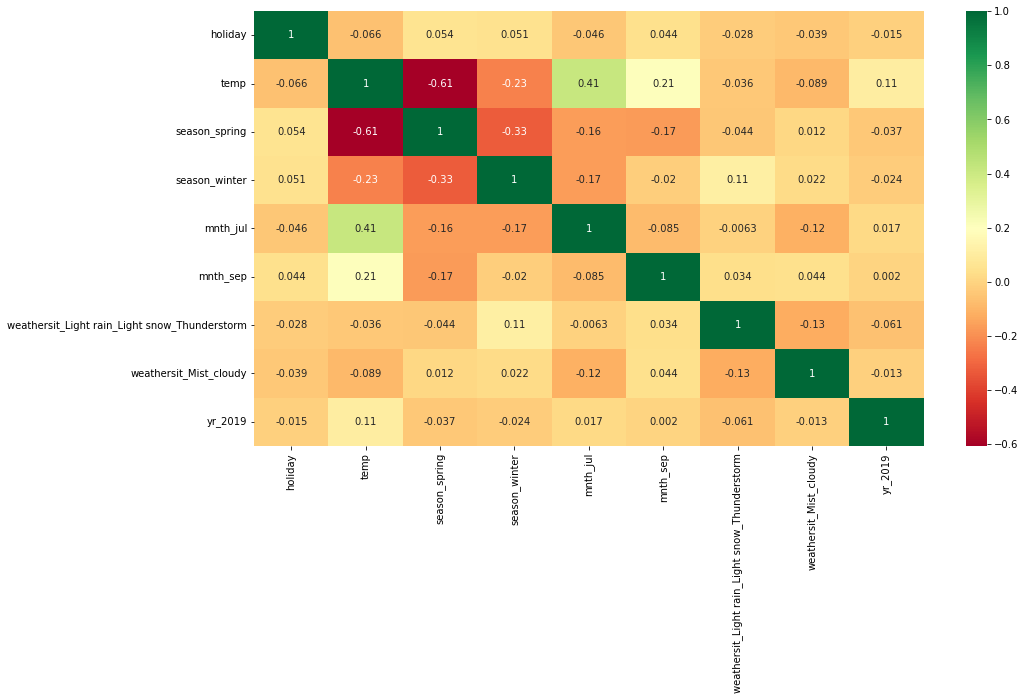

In [71]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")

plt.savefig("heatmap3 final model")
plt.show()

**Insight**

* This model (Model no- 7 ) is ***very good***, as there are seems to be very   low multicollinearity between the predictor and the p_values for all predictors seem to be signigficant

* this model have ~0 in  ***p-vlaue*** in any varible
* in this model 

_________________________
Some statistic is 

* r2 : **82.2**
* adjusted r2 : **81.9**
* F-Statistic : **257**
* Prob (F-statistic):	**2.04e-181**

## 7. Final model Interpretation

**1. Hypothesis Testing**

hypothesis testing is stats that:-
- Ho : B1 = B2 = B3 = ......... = Bi  # Nulll Hypothesis
- H1 : Bi != 0                        # alternative hypothesis
        

#### Model 7 coefficients values

- const      : 1714.0083
- holiday    : -878.4665
- temp       : 4086.7479
- season_spring : -972.7475
- season_winter : 475.8714
- mnth_jul   : -601.9850
- mnth_sep   :  566.0406
- weathersit_Light rain_Light snow_Thunderstorm  : -2607.3376
- weathersit_Mist_cloudy : -683.1160
- yr_2019	: 2031.4367



**2. F-Statistic**

F-statistics is used for testing the overall singnificance of the model.

- F-statistic: 257
- Prob (F-statistic): 2.04e-181

F-statistic value of **257** and p-value of **~0.000** states that the overall model is significant.

**3. Best fit line**

The equation of best fitted surface based on model 7:

cnt = 1714.0083 + (holiday × -878.4665) + (temp × 4086.7479) + (season_spring × -972.7475) − (season_winter × 475.8714) + (mnth_jul × -601.9850) + (mnth_sep × 566.0406) + (weathersit_light_rain_light_thunderstrom × -2607.3376) − (weathersit_misty_cloudy × -683.1160) − (yr × 2031.4367)

**4. Interpretation of coefficients**

- const      : 1714.0083
- holiday    : -878.4665
- temp       : 4086.7479
- season_spring : -972.7475
- season_winter : 475.8714
- mnth_jul   : -601.9850
- mnth_sep   :  566.0406
- weathersit_Light rain_Light snow_Thunderstorm  : -2607.3376
- weathersit_Mist_cloudy : -683.1160
- yr_2019	: 2031.4367


* **const** : The Constant value of 1714.0083 indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 1714.0083 units.

* **holiday** : A coefficient value of -878.4665 indicated that a unit decrease in holiday variable, decrease the bike hire numbers by -878.4665 units.


* **temp** : A coefficient value of 4086.7479 indicated that a unit increase in temp variable, increases the bike hire numbers by 4086.7479 units.

* **season_spring** : A coefficient value of -972.7475 indicated that a unit increase in season_spring variable decrease the bike hire numbers by -972.7475 units.

* **season_winter** : A coefficient value of 475.8714 indicated that w.r.t season_spring, a unit increase in season_winter variable increases the bike hire numbers by 475.8714 units.

* **mnth_jul**: A coefficient value of -601.9850 indicated that w.r.t mnth_jan, a unit increase in mnth_jul variable increases the bike hire numbers by -601.9850 units.

* **mnth_sep** : A coefficient value of 566.0406 indicated that w.r.t mnth_jan, a unit increase in mnth_sep variable slightly increases the bike hire numbers by 566.0406 units.

* **weathersit_light_rain_light_thunderstrom** : A coefficient value of -2607.3376 indicated that, w.r.t Weathersit_misty_cloud, a unit increase in Weathersit_clear_few_cloud variable, decreases the bike hire numbers by -2607.3376 units.

* **weathersit_misty_cloud** : A coefficient value of -683.1160 indicated that, w.r.t seasons, a unit decrease in Weathersit_clear_few_cloud variable, decreases the bike hire numbers by -683.1160 units.

* **yr_2019** : A coefficient value of 2031.4367 indicated that a unit increase in yr_2019 variable, increases the bike hire numbers by 2031.4367 units. 

## 8. Assumptions

**1. Residual Analysis**

* residual  analysis of training data

In [72]:
# predict the value
y_train_pred = lr_model7.predict(X_train_sm7)

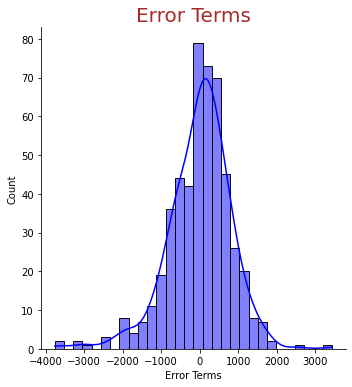

In [73]:
# ploting histogram of the error terms
res = y_train - y_train_pred # residual


sns.displot(res, kde=True,color="blue")
plt.title("Error Terms", size=20 ,c="brown")
plt.xlabel("Error Terms", size=10)
plt.ylabel("Count", size=10 )


plt.show()


**insight**

- In this Histogram plot, the Residuals are **normally distributed**. Hence our assumption for Linear Regression is **valid**.

**2. Again Checking linear relationship between variable X and Y**


[]

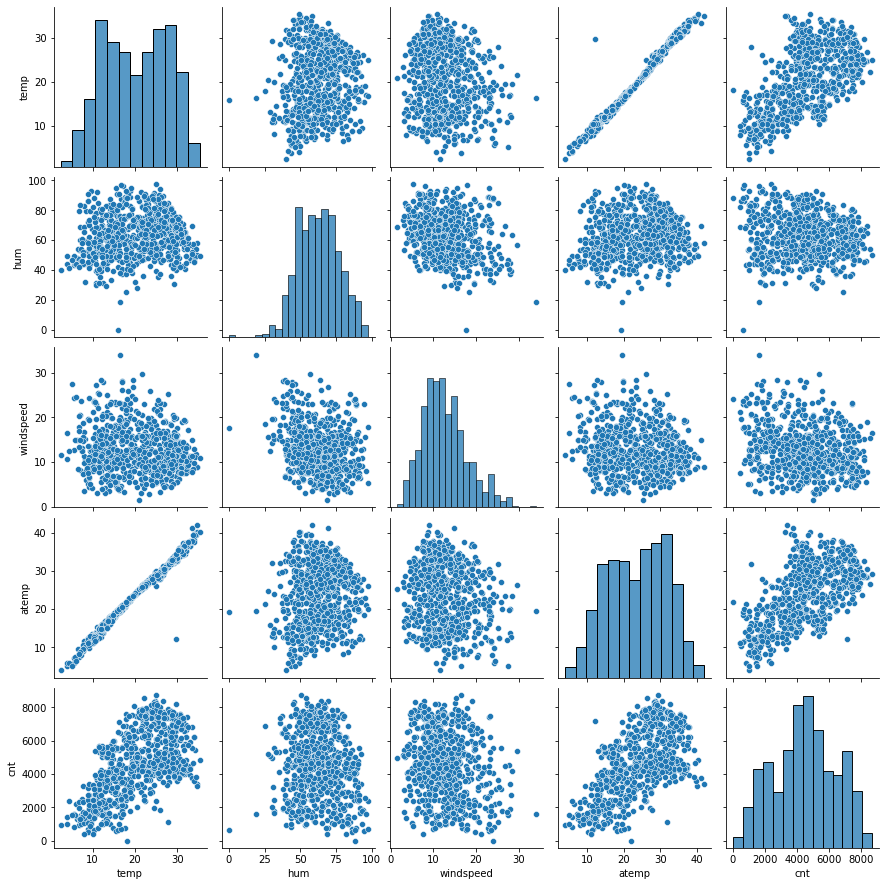

In [74]:
# show relationship between variables X and Y 
num_vars2 = bike[["temp", "hum","windspeed","atemp","cnt"]]

sns.pairplot(num_vars2)
plt.plot()

**insight**
- Using the pair plot, we could see there is a linear relation between **temp** and **atemp** variable with the predictor **cnt**.

**3. Multicollinearity check**


In [75]:
#creating dataframe and checking vif
vif = pd.DataFrame()
vif["features"] = X_train_new.columns
vif["vif"] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif["vif"] = round( vif["vif"],2 )
vif= vif.sort_values("vif", ascending=False)
vif

,features,vif
1,temp,2.99
8,yr_2019,2.05
7,weathersit_Mist_cloudy,1.51
3,season_winter,1.33
4,mnth_jul,1.33
2,season_spring,1.25
5,mnth_sep,1.19
6,weathersit_Light rain_Light snow_Thunderstorm,1.06
0,holiday,1.04


**insight**

- From VIF, we can see that there is **no multicollinearity** existing between the predictor variables, as all the values are within **permissible range** of below 5

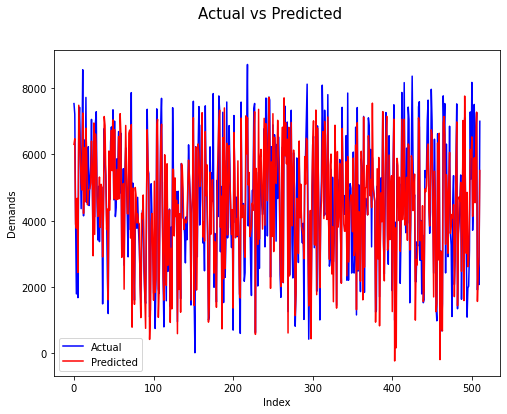

In [76]:
# Actual vs Predicted
plt.rcParams["figure.figsize"] = (8, 6)
c = [i for i in range(0,len(X_train_new),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.legend(["Actual","Predicted"])
plt.show()

**insight**

- Actual and Predicted values appears approximately same.

## 9. Making Prediction 

**Prediction of values on test dataset** 

In [77]:
# Rescaling the test data
num_vars=['temp','atemp','hum','windspeed']

X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [78]:
f_cols = ['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy', 'yr_2019', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed']

# predicting test data values
y_test_pred = lr.predict(X_test[f_cols])

## 9. Evaluating the Model

#### 1. R2 Score (test data)

In [79]:
#evaluating the model based on r2_score(as mentioned in the problem statement as well)
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8231048558003362

#### 1. R2 Score (train data)

In [80]:
#evaluating the model based on r2_score(as mentioned in the problem statement as well)
r2_score(y_train, y_train_pred)

0.8219462191893212

Text(0, 0.5, 'y_pred')

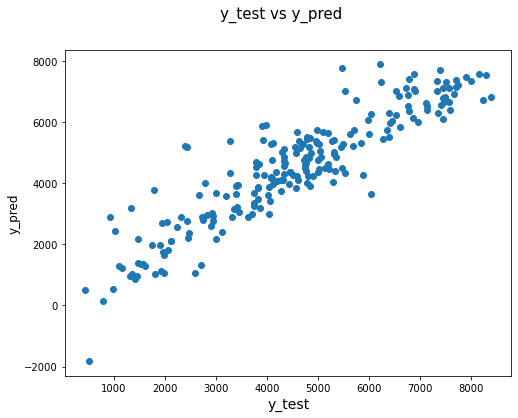

In [81]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

## Final Summary

In [82]:
print(lr_model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          2.04e-181
Time:                        16:04:15   Log-Likelihood:                -4155.7
No. Observations:                 511   AIC:                             8331.
Df Residuals:                     501   BIC:                             8374.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## Final Report 

#### cnt = 1714.0083 + (holiday × -878.4665) + (temp × 4086.7479) + (season_spring × -972.7475) − (season_winter × 475.8714) + (mnth_jul × -601.9850) + (mnth_sep × 566.0406) + (weathersit_light_rain_light_thunderstrom × -2607.3376) − (weathersit_misty_cloudy × -683.1160) − (yr × 2031.4367)

###### The demand of the bike rental depend on the mainly on below variables:

yr, holiday, spring, mist_cloudy,winter, light_rain_light_snow_Thunderstrom, 2,3,4,5,6,7,9,  sunday 

- **demand increase**- in the month of 2,3,4,5,6,7,9 and 10, yr, spring, clear weathersit, winter

- **demand decrease**- if it holiday, sunday, light_snow_light_thunderstrom,misty cloud

**Demand is higher in month of 2,3,4,5,6,7 and 10**

## Significant Variables

holiday                                       
temp                                        
season_spring                               
season_winter                                   
mnth_jul                                       -
mnth_sep                                        
weathersit_Light rain_Light snow_Thunderstorm 
weathersit_Mist_cloudy                        
yr_2019                                       